In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import re
from scipy.stats import pearsonr
std_fontsize = 12

In [2]:
def clear_ax(ax, top=False, bottom=False, left=False, right=False):
    ax.spines['top'].set_visible(top)
    ax.spines['bottom'].set_visible(bottom)
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(right)
    # ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(True)
    ax.yaxis.set_tick_params(width=0.0, labelsize=8)
    ax.xaxis.set_tick_params(width=0.0, labelsize=8)

In [3]:
p2hpos = {}

with open('../Resources/CHCO_GermlineHPOTerms.csv') as f:
    for line in f:
        row = line.strip().split(',')
        # specimen_id + micronic_id -> [hpo terms]
        if len(row) < 3 or 'specimen_id' in row[0]:
            continue
        hpos = [x.replace('"','') for x in row[2:] if 'HP:' in x]
        if len(hpos) == 0:
            continue
        p2hpos[row[0] + '_' + row[1]] = hpos
        

In [4]:
print(len(p2hpos))
num_hpos = [len(x) for x in p2hpos.values()]


481


# CHCO patient results - figure 6

Average number of HPO terms 3.871101871101871
average number of lines per vcf 42448.52173913043
[78, 98, 105, 92, 97, 75, 88, 88, 94, 94, 95, 104, 86, 67, 67, 73, 100, 82, 91, 80, 97, 104, 86, 93, 89, 94, 100, 81, 96, 73, 86, 83, 83, 97, 113, 87, 87, 105, 87, 90, 83, 82, 79, 90, 107, 85, 96, 78, 88, 79, 88, 102, 82, 97, 90, 94, 97, 87, 87, 99, 94, 90, 91, 91, 80, 58, 85, 76, 83, 97, 79, 70, 99, 83, 92, 81, 78, 102, 86, 79, 75, 117, 89, 101, 85, 103, 67, 107, 97, 100, 82, 93, 102, 89, 93, 92, 94, 81, 87, 84, 96, 105, 80, 75, 72, 86, 91, 93, 81, 80, 88, 109, 64, 87, 81, 94, 80, 93, 81, 89, 82, 73, 93, 88, 99, 97, 91, 90, 79, 71, 102, 83, 70, 98, 90, 103, 85, 78, 12, 108, 88, 94, 101, 89, 74, 91, 84, 76, 109, 74, 79, 87, 91, 94, 70, 81, 79, 93, 85, 91, 105, 88, 104, 84, 99, 91, 92, 86, 97, 88, 87, 89, 83, 80, 76, 73, 109, 91, 71, 90, 100, 85, 70, 94, 104, 130, 99, 85, 91, 102, 75, 86, 89, 96, 83, 98, 79, 85, 78, 108, 81, 99, 86, 85, 89, 96, 99, 77, 97, 84, 94, 90, 89, 77, 93, 93, 74, 67, 

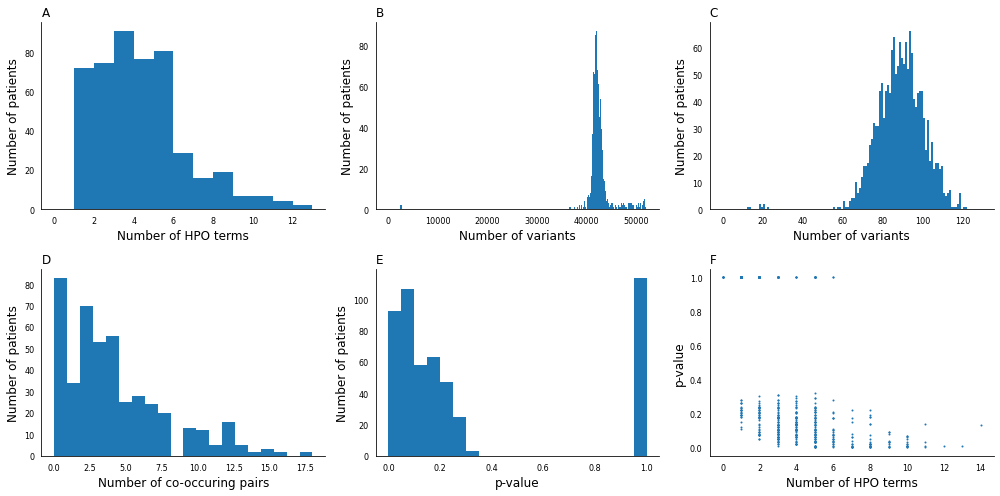

Correlation coefficient between number of hpo terms and p value  PearsonRResult(statistic=-0.5143735076566218, pvalue=8.613214300139883e-36)
Correlation coefficient between number of hpo terms and p value (p != 1)  PearsonRResult(statistic=-0.5015579553327166, pvalue=1.2860992166951374e-26)


In [5]:
# plot distribution of number of hpo terms per patient
fig, ax = plt.subplots(2,3)
fig.set_size_inches(14, 7)

ax[0,0].hist(num_hpos, bins=range(0, max(num_hpos), 1))
ax[0,0].set_title('A',loc='left',fontsize=std_fontsize)
ax[0,0].set_xlabel('Number of HPO terms',fontsize=std_fontsize)
ax[0,0].set_ylabel('Number of patients',fontsize=std_fontsize)
clear_ax(ax[0,0], bottom=True, left=True)

# average number of hpo terms per patient
print('Average number of HPO terms', sum(num_hpos) / len(num_hpos))

line_counts = []
for line in open('../Resources/lines_per_vcf.txt','r'):
    row = line.strip().split(' ')
    line_counts.append(int(row[0]))

# plot distribution of number of lines per vcf
ax[0,1].hist(line_counts, bins=range(0, max(line_counts), 100))
ax[0,1].set_title('B',loc='left',fontsize=std_fontsize)
ax[0,1].set_xlabel('Number of variants',fontsize=std_fontsize)
ax[0,1].set_ylabel('Number of patients',fontsize=std_fontsize)
clear_ax(ax[0,1], bottom=True, left=True)

# average number of lines per vcf
print('average number of lines per vcf', sum(line_counts) / len(line_counts))

# filter VCF
line_counts = []
for line in open('../Resources/filtered_number_lines_per_vcf.txt','r'):
    row = line.strip().split(' ')
    line_counts.append(int(row[0]))
print(line_counts)
print(len(line_counts))

# plot distribution of number of lines per vcf
ax[0,2].hist(line_counts, bins=range(0, max(line_counts)))
ax[0,2].set_title('C',loc='left',fontsize=std_fontsize)
ax[0,2].set_xlabel('Number of variants',fontsize=std_fontsize)
ax[0,2].set_ylabel('Number of patients',fontsize=std_fontsize)
clear_ax(ax[0,2], bottom=True, left=True)
# average number of lines per vcf
print('average number of lines per vcf filtered',sum(line_counts) / len(line_counts))

# Load in the results from CHCO private repo
sid2novel = {}
sid2preexisting = {}
sid = None
novel = None
preexisting = None
with open('../Resources/all_reports.p0.05.txt','r') as f:
    for line in f:
        assert 'p0.05_' in line
        sid = line.strip().split('-')[-1]
        # get the novel count
        line = next(f)
        assert 'novel' in line
        if 'None' in line:
            novel = 0
        else:
            novel = int(line.strip().split(':')[-1])
        
        # get the preexisting count
        line = next(f)
        assert 'preexisting' in line
        if 'None' in line:
            preexisting = 0
        else:
            preexisting = int(line.strip().split(':')[-1])
        
        if novel == 0 and preexisting == 0:
            continue

        if sid not in sid2novel:
            sid2novel[sid] = novel
            sid2preexisting[sid] = preexisting
        elif sid2novel[sid] > sid2novel[sid]:
            sid2novel[sid] = novel
            sid2preexisting[sid] = preexisting

print(len(sid2novel))
print(len(sid2preexisting))

# count the number with > 0 novel
print('Number of samples with a novel match',sum([x > 0 for x in sid2novel.values()]))
print('Number of samples with a preexisting match',sum([x > 0 for x in sid2preexisting.values()]))

# print the average of the novel and preexisting counts
print('Average number of novel matches: ', sum(sid2novel.values())/len(sid2novel))
print('Average number of preexisting matches: ', sum(sid2preexisting.values())/len(sid2preexisting))

# what is the median number of novel and preexisting matches?
print('Median number of novel matches: ', sorted(sid2novel.values())[len(sid2novel)//2])
print('Median number of preexisting matches: ', sorted(sid2preexisting.values())[len(sid2preexisting)//2])

ax[1,0].hist(sid2novel.values(), bins=20)
ax[1,0].set_xlabel('Number of co-occuring pairs',fontsize=std_fontsize)
ax[1,0].set_ylabel('Number of patients',fontsize=std_fontsize)
ax[1,0].set_title('D',loc='left',fontsize=std_fontsize)
clear_ax(ax[1,0], bottom=True, left=True)

# load the p value data also from the CHCO private repo
pdf = pd.read_csv('../Resources/shuffle_null_model_pvals.tsv',sep='\t')
ax[1,1].hist(pdf['pval'], bins=20)
ax[1,1].set_xlabel('p-value',fontsize=std_fontsize)
ax[1,1].set_ylabel('Number of patients',fontsize=std_fontsize)
ax[1,1].set_title('E',loc='left',fontsize=std_fontsize)
clear_ax(ax[1,1], bottom=True, left=True)

# hid ax 1,2
ax[1,2].scatter(pdf['num_hpos'], pdf['pval'], s=1)
ax[1,2].set_xlabel('Number of HPO terms',fontsize=std_fontsize)
ax[1,2].set_ylabel('p-value',fontsize=std_fontsize)
ax[1,2].set_title('F',loc='left',fontsize=std_fontsize)
clear_ax(ax[1,2], bottom=True, left=True)

plt.tight_layout()
plt.savefig('../PublicationFigures/chco_results.png', dpi=300)
plt.show()

# what is the correlation coefficient between the number of hpo terms and the p value?
print('Correlation coefficient between number of hpo terms and p value ', pearsonr(pdf['num_hpos'], pdf['pval']))
# and correlation for those samples that are not p =1
print('Correlation coefficient between number of hpo terms and p value (p != 1) ', pearsonr(pdf[pdf['pval'] != 1]['num_hpos'], pdf[pdf['pval'] != 1]['pval']))